# Problem Set 3

## Question 1

In [174]:
import pandas as pd
import numpy as np

In [175]:
users = pd.read_csv("question1.csv")

In [176]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [177]:
# Step 4
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [178]:
# step 5:  Discover the Male ratio per occupation and sort it from the most to the least
newGroup = users.gender.apply(lambda x: x == 'M')
newGroup


0       True
1      False
2       True
3       True
4      False
       ...  
938    False
939     True
940     True
941    False
942     True
Name: gender, Length: 943, dtype: bool

In [179]:
# step 6 For each occupation, calculate the minimum and maximum ages
users.groupby('occupation').age.min()

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [180]:
users.groupby('occupation').age.max()

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

In [181]:
# step7 :  For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [182]:
# Step 8. For each occupation present the percentage of women and men
newGroup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'}).div(users.groupby(['occupation']).count(), level = "occupation")
newGroup.loc[:, 'gender'] * 100

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

In [183]:
occup_count = users.groupby(['occupation']).gender.count()
occup_count

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: gender, dtype: int64

# Question 2

In [184]:
euro12 = pd.read_csv("question2.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [185]:
# Step 4. Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [186]:
# Step 5. How many team participated in the Euro2012?
len(euro12['Team'].unique())

16

In [187]:
# Step 6. What is the number of columns in the dataset?
euro12.shape[1]

35

In [188]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
# to a dataframe called discipline
discipline = euro12.loc[:, ['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [189]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
firstSort = discipline.sort_values(by=['Red Cards'])
secondSort = firstSort.sort_values(by=['Yellow Cards'])
secondSort

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
11,Republic of Ireland,6,1
1,Czech Republic,7,0
14,Sweden,7,0


In [190]:
# Step 9. Calculate the mean Yellow Cards given per Team
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [191]:
# Step 10. Filter teams that scored more than 6 goals

filtered1 = euro12.groupby('Team').Goals.sum()
filtered1[filtered1 > 6]

Team
Germany    10
Spain      12
Name: Goals, dtype: int64

In [192]:
#Step 11. Select the teams that start with G
filtered2 = euro12[euro12.Team.str[0] == 'G']
filtered2

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [193]:
# Step 12. Select the first 7 columns
euro12.iloc[: ,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [194]:
# Step 13. Select all columns except the last 3
euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [195]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12[euro12.Team.isin(['England', 'Italy', 'Russia'])]['Shooting Accuracy']

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

# Question 3

Step 2. Create 3 differents Series, each of length 100, as follows:


• The first a random number from 1 to 4


• The second a random number from 1 to 3


• The third a random number from 10,000 to 30,000

In [196]:
series1 = pd.Series(np.random.randint(1, high=5, size=100))
series2 = pd.Series(np.random.randint(1, high=3, size=100))
series3 = pd.Series(np.random.randint(10000, high=30000, size=100))

In [197]:
# Step 3. Create a DataFrame by joinning the Series by column
df = pd.concat([series1, series2, series3], axis=1)
df

,0,1,2
0,2,1,17321
1,1,2,25791
2,4,2,15342
3,4,1,12574
4,4,1,17278
...,...,...,...
95,3,1,16321
96,3,1,14522
97,4,2,29348
98,3,1,10933


In [198]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
df

,bedrs,bathrs,price_sqr_meter
0,2,1,17321
1,1,2,25791
2,4,2,15342
3,4,1,12574
4,4,1,17278
...,...,...,...
95,3,1,16321
96,3,1,14522
97,4,2,29348
98,3,1,10933


In [199]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
#to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0)
bigcolumn = bigcolumn.to_frame()

bigcolumn

,0
0,2
1,1
2,4
3,4
4,4
...,...
95,16321
96,14522
97,29348
98,10933


In [200]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
len(bigcolumn)

# No data is there but index only goes untill 99.

300

In [201]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn

,0
0,2
1,1
2,4
3,4
4,4
...,...
295,16321
296,14522
297,29348
298,10933


# Question 4

# Question 5

In [202]:
import io

chipo = pd.read_csv("question5.csv", sep="	")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [203]:
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [204]:
# Step 5. What is the number of observations in the dataset?
chipo.shape

(4622, 5)

In [205]:
# Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [206]:
# Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [207]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [208]:
# Step 9. Which was the most-ordered item?
sumItem = chipo.groupby('item_name').sum()
sumItem
sumItem = sumItem.sort_values(['quantity'], ascending = False)
sumItem.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [209]:
# Step 10. For the most-ordered item, how many items were ordered?
sumItem['order_id'].head(1)

item_name
Chicken Bowl    713926
Name: order_id, dtype: int64

In [210]:
# Step 11. What was the most ordered item in the choice_description column?
choiceSum = chipo.groupby('choice_description').sum()
choiceSum = choiceSum.sort_values(['quantity'], ascending = False)
choiceSum.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [211]:
# Step 12. How many items were orderd in total?
print(chipo.quantity.sum())

4972


In [212]:
#Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type

chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))
chipo.item_price.dtype

dtype('float64')

In [213]:
# Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['item_price'] * chipo['quantity']).sum()
revenue

39237.02

In [214]:
# Step 15. How many orders were made in the period?
print(chipo.order_id.value_counts().count())

1834


In [215]:
# Step 16. What is the average revenue amount per order?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby(by=['order_id'])['revenue'].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

In [216]:
# Step 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

# Question 6

In [217]:
df = pd.read_csv("question6.csv")
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


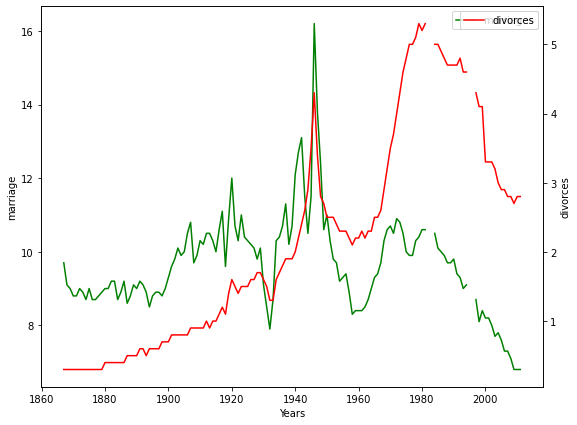

In [218]:
import matplotlib.pyplot as plt

years = df['Year'].values
marriages_per_capita = df['Marriages_per_1000'].values
divorces_per_capita = df['Divorces_per_1000'].values

# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[9, 7])

# Plot a simple line chart
ax.plot(years, marriages_per_capita, color='g', label='marriages')
ax.set_xlabel('Years')
ax.set_ylabel('marriage')
ax.legend()

ax2 = ax.twinx()

# Plot another line on the same chart/graph
ax2.plot(years, divorces_per_capita, color='r', label='divorces')
ax2.set_xlabel('Years')
ax2.set_ylabel('divorces')

ax2.legend()
plt.show()


# Question 7

In [219]:
m_d_df = df[
    df['Year'].apply(lambda x: x in [1900, 1950, 2000])]
m_d_df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


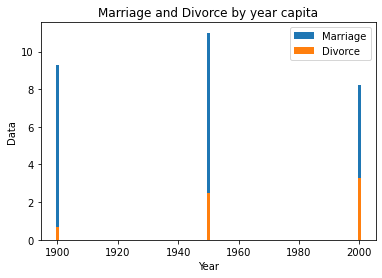

In [220]:
plt.bar(m_d_df['Year'], m_d_df['Marriages_per_1000'], width=0.8, bottom=None,  label="Marriage")
plt.bar(m_d_df['Year'], m_d_df['Divorces_per_1000'], width=0.8, bottom=None,  label="Divorce")

plt.ylabel('Data')
plt.xlabel('Year')
plt.title('Marriage and Divorce by year capita')
plt.legend()
plt.show()